# Занятие 2. Основы машинного обучения. Построение базовой модели распознавания лиц.

### План занятия

1. Задача регрессии. Линейная регрессия
2. Задача классификации:

      2.1. логистическая регрессия

            + валидация модели
            + оценка качества модели

      2.2. метод опорных векторов

            + ядровой метод опорных векторов
            + многоклассовая классификация

3. (**Baseline**) Обучаем базовую модель распознавания лиц.

4. **Домашнее задание 2**

# Обучение с учителем

Сегодня мы поговорим про два важных типа задач в машинном обучении - это регрессия и классификация.


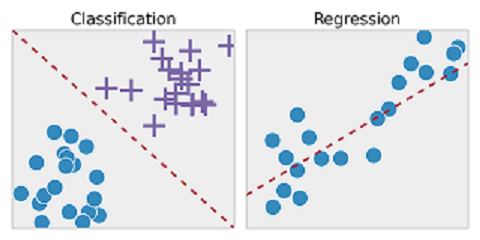

# 1. Линейная регрессия

Чаще всего первая модель, которую изучают в машинном обучении - это линейная регрессия. Чуть позже мы поговорим о том, почему это так :) 

**Задача регрессии** состоит в том, чтобы по признакам объекта предсказать целевую переменную, которая может принимать любые значения (в том числе нецелые и отрицательные).

Примеры задач регрессии:


*   *предсказание стоимости дома по его характеристикам*
*   *предсказание зарплаты сотрудника по его резюме*
*   *предсказание курса валют*
и так далее.


*Линейная* регрессия - это модель регрессии, которая предполагает, что целевая переменная линейно зависит от признаков объекта.



**Пример 1:** если мы предсказываем для дома (**x**) его стоимость по площади ($x_1$), то модель линейной регрессии делает предсказание по формуле:
$$a(x) = w_0 + w_1\cdot x_1.$$

Здесь $w_0, w_1$ - некоторые заранее неизвестные числа (веса модели), которые мы впоследствии определим по обучающим данным (это называется *обучением модели*).

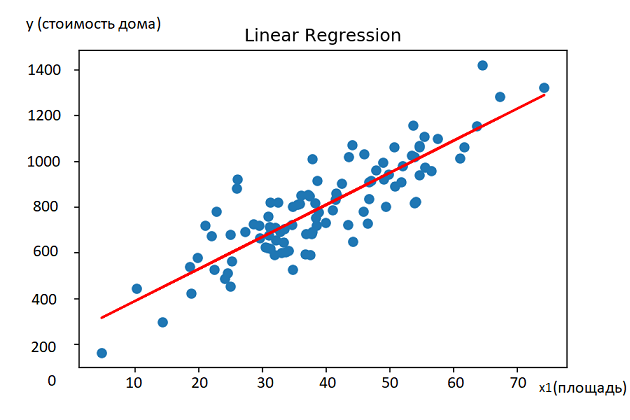

**Пример 2:** мы можем предсказывать для дома (**x**) его стоимость по нескольким признакам. Например, по площади ($x_1$), количеству комнат ($x_2$) и числу этажей ($x_3$). Тогда модель линейной регрессии делает предсказание по формуле:
$$a(x) = w_0 + w_1\cdot x_1 + w_2\cdot x_2 + w_3\cdot x_3.$$

С помощью линейной регрессии предскажем рост человека по его весу.

Для начала загрузим набор данных.

In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Murcha1990/CV_mini_course/main/Session2/weights_heights.csv")
df.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


Сформируем матрицу X объект-признак и вектор y с целевой переменной.

In [3]:
X = df[['Weight']]
y = df['Height']

Объявим модель линейной регрессии и обучим её на наших данных.

In [4]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

***Что означает обучить модель?***

*     *Модель* - это функция $a(x)$, которая для каждого объекта $x$ предсказывает значение целевой переменной. 

*     *Мы обучаем модель по данным с известными ответами*, то есть для каждого объекта $x$ мы знаем правильный ответ - $y$ (например, в задаче предсказания стоимости дома мы для каждого дома из нашей выборки знаем его стоимость).

*     Хорошая модель - это модель, хорошо предсказывающая целевую переменную, то есть, модель, для которой ошибка предсказания мала. В задаче регрессии чаще всего вычисляют среднеквадратичную ошибку (MSE):
$$MSE = \frac1l\sum\limits_{i=1}^{l}(a(x_i)-y_i)^2,$$
где $l$ - количество объектов.

*     Модель $a(x)$ - это функция, зависящая от некоторых параметров (весов), например, в случае линейной регрессии это может быть функция вида
$$a(x)=w_0+w_1x_1+\dots+w_dx_d,$$
где $x_1,\dots,x_d$ - признаки объекта $x$.

*     ***При обучении происходит подбор таких весов $w$, чтобы ошибка $MSE$ была наименьшей.***

Сделаем предсказание с помощью обученной модели.

In [5]:
prediction = model.predict(X)

df['Prediction'] = prediction
df[['Height','Prediction']].head()

,Height,Prediction
0,65.78331,66.837887
1,71.51521,68.764626
2,69.39874,70.120989
3,68.21660,69.244211
4,67.78781,69.405084


Визуализируем данные и полученную линию регрессии.

Text(0, 0.5, 'Height')

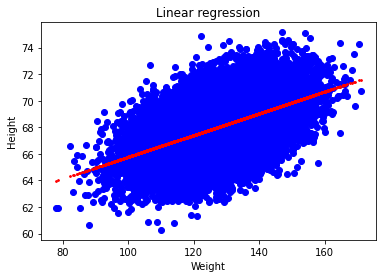

In [6]:
from matplotlib import pylab as plt

plt.scatter(df['Weight'], df['Height'], c='blue')
plt.scatter(df['Weight'], df['Prediction'], s=3, c='red')
plt.title('Linear regression')
plt.xlabel('Weight')
plt.ylabel('Height')

Если мы хотим посмотреть на итоговую формулу для предсказания, то необходимо вывести веса модели:

*    model.coef_ - веса при признаках
*    model.intercept_ - свободный коэффициент

In [7]:
print(model.intercept_)
print(model.coef_)

57.57170991308267
[0.08200701]


Таким образом, формула для предсказания имеет вид
$$Height = 57.57 + 0.08\cdot Weight$$

# 2. Классификация

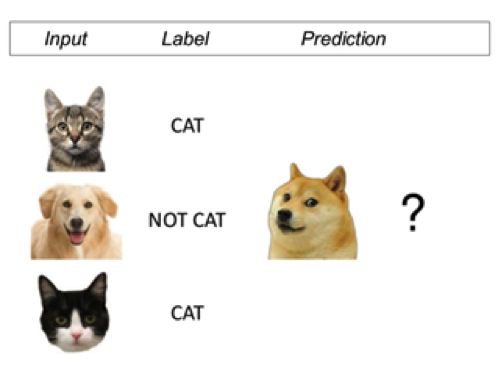

В задаче бинарной классификации целевая переменная - это *класс объекта*.

Примеры задач бинарной классификации:


*   *определить, болен пациент некоторой болезнью или нет*
*   *определить, вернёт клиент кредит или нет*
*   *определить, уйдет пользователь из сети или нет*
и так далее.

Очень легко перейти от задачи регрессии к задаче бинарной классификации. Если в задаче регрессии (например, линейной) предсказание строилось по формуле:

$$a(x) = w_0 + w_1\cdot x_1 + \dots + w_n\cdot x_n = (w, x),$$

то для определения класса объекта можно взять знак полученной суммы:

$$a(x) = sign(w, x)$$

Получился **линейный бинарный классификатор!**

Существует множество алгоритмов для решения задачи классификации. У каждого из них своя идея и свои особенности реализации.

Сегодня мы идейно обсудим два самых известных линейных классификтора:


*   *логистическая регрессия*
*   *метод опорных векторов*

Более подробно, с полными математическими обоснованиями про эти модели можно прочесть [здесь](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/lecture-notes/lecture06-linclass.pdf).

# 2.1. Логистическая регрессия

**Логистическая регрессия** - это линейный классификатор, отличительной особенностью которого является умение корректно предсказывать вероятности.

Например, в задаче кредитного скоринга логистическая регрессия может не только выдать предсказание и сказать, что клиент $x$ относится, скажем, к положительному классу (вернёт кредит) 
$$a(x) = +1,$$
но и может оценить вероятность этого события (число ниже взято для примера):
$$p(y = +1 | x) = 0.7$$

Потренируемся решать задачу классификации на датасете, содержащем характеристики трех типов цветков ирисов (каждый цветок имеет 4 числовые характеристики - длина и ширина лепестка, длина и ширина чашелистника).

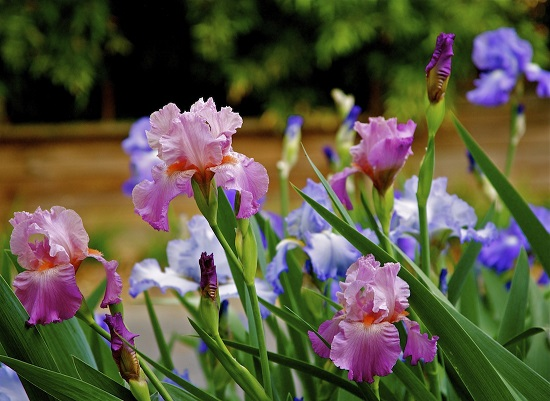

In [8]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data['target']

Решим задачу бинарной классификации. Для этого скажем, что мы решаем задачу определения, является ли ирис цветком типа $1$ или нет.

In [9]:
y[y == 0] = 0
y[y == 2] = 0

# y[y == 1] = 1

Объявим модель, обучим её и сделаем предсказание.

In [10]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression()
model_logreg.fit(X, y)

prediction = model_logreg.predict(X)

Оценим результат классификации визуально.

In [11]:
print(y[30:70])
print(prediction[30:70])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1]


Если мы хотим посмотреть на предсказанные вероятности, то вызываем метод predict_proba.

In [12]:
probs = model_logreg.predict_proba(X)

In [13]:
probs[0], prediction[0]

(array([0.88676836, 0.11323164]), 0)

# Как проверить качество модели?

**Нельзя и обучать модель, и проверять её качество на одних и тех же данных!** В этом случае модель при обучении просто запомнит ответы на объектах и выдаст ожидаемо хорошие предсказания.

Для оценки качества модели необходимо разбить данные на две части: **тренировочную** и **тестовую**.

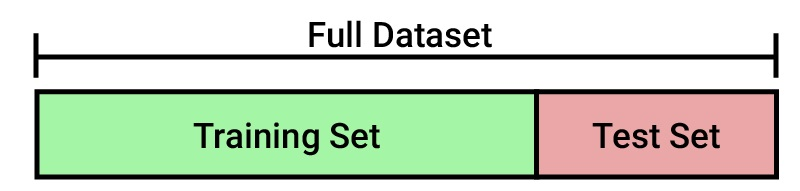

*    На **тренировочной части** мы будем *обучать* модель. При обучении модель будет смотреть на признаки и ответы на каждом объекте и подбирать оптимальные параметры по данным.

*    Оценивать качество модели необходимо на данных, которых она не видела - для этого нужна **тестовая часть**. 

Разобъем данные на тренировочную и тестовую часть.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Обучим модель на тренировочной части и сделаем предсказание на тесте.

In [15]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)

prediction_logreg = model_logreg.predict(X_test)

Визуально оценим качество предсказаний. Теперь это будет корректно!

In [16]:
print(y_test)
print(prediction_logreg)

[0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 1 1 1 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0]


# Метрики качества классификации

Для численной оценки качества классифкации используются специальные функции - **метрики**.

Самые популярные метрики качества классификации:


*    accuracy
*    precision, recall
*    f1-score
*    roc-auc
и другие.

1. Метрика **accuracy** - самая известная метрика. Это просто доля правильных ответов модели. Но её нельзя использовать, когда классы несбалансированы.

2. В случае дисбаланса классов (как у нас в задаче с ирисами) можно использовать, например, **f1-score**.

Значения обеих этих метрик принадлежат отрезку $[0, 1]$, и чем больше значение, тем лучше качество модели.

Подробнее про метрики качества классификации можно почитать [здесь](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/lecture-notes/lecture05-linclass.pdf).

In [17]:
from sklearn.metrics import accuracy_score, f1_score

f1_score(y_test, prediction_logreg)

0.5454545454545454

# 2.2. Метод опорных векторов (Support Vector Machine, SVM)

Рассмотрим такой пример: пусть на плоскости даны некоторые точки, разбитые на 2 класса.

<img src='https://habrastorage.org/storage/habraeffect/8c/98/8c98d4824065028420f290d88e52b40e.png'>

Проведем линию, разделяющую эти два класса. Тогда любые новые точки автоматически классифицируются следующим образом:
* если точка лежит выше прямой, то она будет отнесена к классу A
* если ниже - к классу B

Заметим, что, вообще говоря, можно провести не единственную такую прямую. Но какую именно выбрать?

<img src='https://habrastorage.org/storage/habraeffect/7c/5f/7c5f4284e204a7c4b544a9ca175a2b13.png'>

С точки зрения *уверенности классификации* лучше выбрать ту прямую, расстояние от которой до каждого класса максимально, так как чем дальше точка от разделяющей прямой, тем увереннее предсказание классификатора на ней. С этой точки зрения подойдет красная прямая на картинке.

Именно такую задачу решает **метод опорных векторов (Support vector machines, SVM)**.

Получается, что SVM - это тоже *линейный классификатор*, только идея и математика этого метода совсем другие нежели в логистической регрессии.

In [18]:
from sklearn.svm import SVC

model_svm = SVC(kernel = 'linear')
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
prediction_svm = model_svm.predict(X_test)

In [20]:
f1_score(y_test, prediction_svm)

0.5454545454545454

## Ядра в SVM

Существуют обобщения классического линейного алгоритма SVM, позволяющие с помощью метода решать нелинейно разделимые задачи. Подход заключается в использовании *ядер*, обобщающих понятие скалярного произведения векторов.

*При выборе различных ядер, алгоритм может решать нелинейные задачи* с различной структурой пространства объект-признак.

Классические используемые ядра:

*    *радиальное (rbf)*
*    *полиномиальное (poly)*
*    *сигмоидальное (sigmoid)*



In [21]:
from sklearn.svm import SVC

model_svm2 = SVC(kernel = 'rbf')
model_svm2.fit(X_train, y_train)

prediction_svm2 = model_svm2.predict(X_test)

f1_score(y_test, prediction_svm2)

0.9032258064516129

# Многоклассовая классификация

Все бинарные классификаторы можно легко обобщить на задачу многоклассовой классификации.

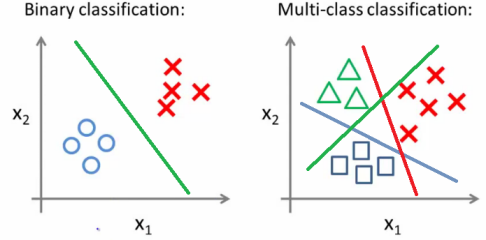

Один из популярных подходов решения задачи многоклассовой классификации - сведение к серии бинарных задач методом "один против всех" (one-vs-all).

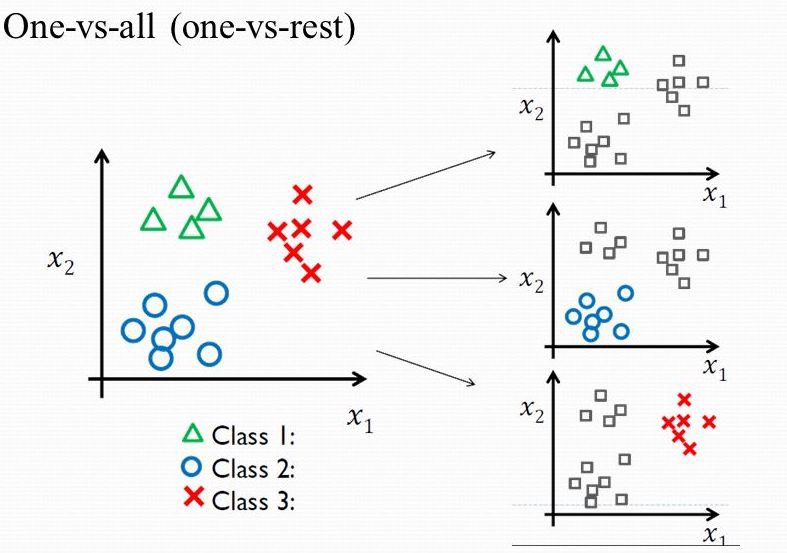

Таким образом, мы без каких-либо ограничений можем использовать любые модели классификации для решения задач многоклассовой классификации.

In [22]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

pred_lr = model_lr.predict(X_test)

accuracy_score(y_test, pred_lr)

0.9555555555555556

In [24]:
model_svm = SVC(kernel='rbf')
model_svm.fit(X_train, y_train)

pred_svm = model_svm.predict(X_test)

accuracy_score(y_test, pred_svm)

0.9777777777777777

# 3. Baseline-решение задачи мини-курса.

Цель мини-курса - построить систему распознавания лиц, то есть обучить модель многоклассовой классификации фотографий.

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2

# use seaborn plotting defaults
import seaborn as sns; sns.set()

## Загрузим датасет и сформируем выборку для решения задачи

In [26]:
import glob
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


При загрузке фотографий приведем все фотографии к размеру 64x64 пикселя.

In [27]:
# read directory and make x, y lists

dirname = "/gdrive/My Drive/ML_mini_course"
labels = ['class1', 'class2', 'class3', 'class4']

x, y = [], []

for label in labels:
    
    subdir = os.path.join(dirname, label)
    filelist = os.listdir(subdir)
    
    for fname in filelist:
        img = cv2.imread(os.path.join(subdir, fname), cv2.IMREAD_GRAYSCALE)
        
        h, w = img.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)
        
        img = img[h0: h0 + size, w0: w0 + size]
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
        x.append(img)
        y.append(label)
len(x), len(y)

(209, 209)

Переведем названия классов в целые числа от 0 до 3 (у нас четыре класса)

In [28]:
labels = {'class1' : 0, 'class2' : 1, 'class3' : 2, 'class4' : 3}

y = [labels[item] for item in y]

Нарисуем первые три изображения

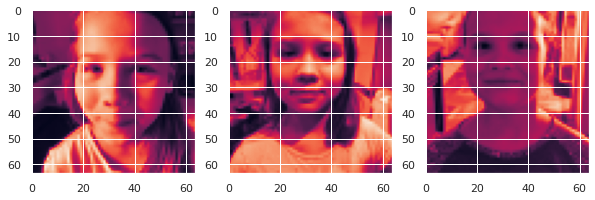

In [29]:
fig, axx = plt.subplots(1, 3, figsize=(10, 5))

for i in range(3):
    img = x[i]
    axx[i].imshow(img)

В матрице объект-признак признаки объекта расположены в строке. Поэтому необходимо "растянуть" каждое изображение в вектор длины $64\cdot 64$.

In [30]:
data = np.asarray([el.ravel() for el in x])

Разобъем данные на обучающую и тестовые выборки, сохранив баланс классов (stratify = y).

In [31]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(data, y, stratify = y, random_state=42)

Обучим логистическую регрессию и оценим её качество (выборка сбалансированная, поэтому используем метрику accuracy).

In [32]:
model_lr = LogisticRegression()
model_lr.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [33]:
pred_lr = model_lr.predict(Xtest)

accuracy_score(ytest, pred_lr)

0.7169811320754716

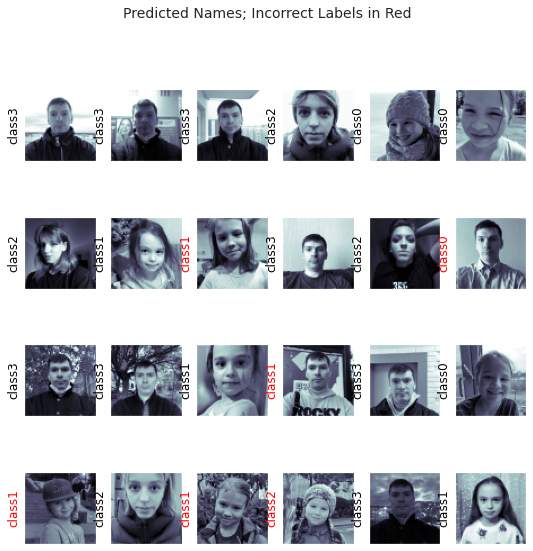

In [34]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(64, 64), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel('class'+str(pred_lr[i]),
                   color='black' if pred_lr[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [35]:
# проверка на сбалансированность
from collections import Counter
Counter(ytest)

Counter({0: 13, 1: 13, 2: 13, 3: 14})

## Расширенная оценка качества алгоритма

In [36]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred_lr,
                            target_names=labels))

              precision    recall  f1-score   support

      class1       0.64      0.54      0.58        13
      class2       0.67      0.77      0.71        13
      class3       0.85      0.85      0.85        13
      class4       0.71      0.71      0.71        14

    accuracy                           0.72        53
   macro avg       0.72      0.72      0.71        53
weighted avg       0.72      0.72      0.71        53



Чтобы понять, каких людей алгоритм лучше всего детектирует, а каких путает и с кем - можно нарисовать матрицу ошибок, которая отражает эту информацию.

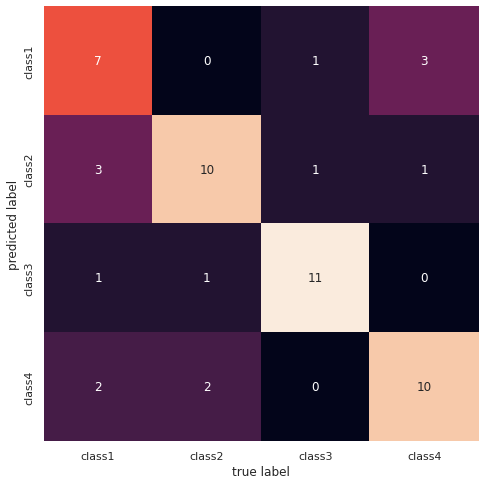

In [37]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, pred_lr)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

# 4. Домашнее задание 2

1. Скачайте фото четырех людей (классов) из общей папки
2. Примените бейзлайн
3. (Бонус) Подберите классификатор и гиперпараметры моделей для достижения наибольшего значения метрики accuracy (если знаете, о чём идёт речь)

In [ ]:
# Ваш код здесь